In [465]:
# Breanna Powell
# CSS 576
# 01/30/2023
# Code initially adapted from https://blog.logrocket.com/email-spam-detector-python-machine-learning/
# Preprocessing techniques from https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm

spam = pd.read_csv('spam.csv')


## DATA EXPLORATION

In [466]:
spam.shape # There are 5572 rows and 5 columns

(5572, 5)

In [467]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       5572 non-null   object
 1   email       5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [468]:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html
# I want to see if this dataset has missing values (NaN). It does.
spam.value_counts(dropna=False)

label  email                                                                                                                                                                                                          Unnamed: 2  Unnamed: 3  Unnamed: 4
ham    Sorry, I'll call later                                                                                                                                                                                         NaN         NaN         NaN           30
       I cant pick the phone right now. Pls send a message                                                                                                                                                            NaN         NaN         NaN           12
       Ok...                                                                                                                                                                                                          NaN         NaN         NaN

# PRE-PROCESSING TECHNIQUES

In [469]:
# Missing Values
spam.dropna(axis=0, thresh=2, inplace=True)
spam.shape # No change!

(5572, 5)

In [470]:
import numpy as np
from sklearn.impute import MissingIndicator
spam.replace(np.NaN, inplace=True)
indicator = MissingIndicator(missing_values=np.NaN)
indicator = indicator.fit_transform(spam)
indicator = pd.DataFrame(indicator)
indicator.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       5572 non-null   bool 
 1   1       5572 non-null   bool 
 2   2       5572 non-null   bool 
dtypes: bool(3)
memory usage: 16.4 KB


In [471]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       5572 non-null   object
 1   email       5572 non-null   object
 2   Unnamed: 2  5477 non-null   object
 3   Unnamed: 3  5477 non-null   object
 4   Unnamed: 4  5291 non-null   object
dtypes: object(5)
memory usage: 217.8+ KB


In [472]:
# Imputing Values
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit_transform(spam)



array([['ham',
        'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
        ' Dont Come Near My Body..!! Bcoz My Hands May Not Come 2 Wipe Ur Tears Off That Time..!Gud ni8"',
        'GE', 'GNT:-)"'],
       ['ham', 'Ok lar... Joking wif u oni...',
        ' Dont Come Near My Body..!! Bcoz My Hands May Not Come 2 Wipe Ur Tears Off That Time..!Gud ni8"',
        'GE', 'GNT:-)"'],
       ['spam',
        "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
        ' Dont Come Near My Body..!! Bcoz My Hands May Not Come 2 Wipe Ur Tears Off That Time..!Gud ni8"',
        'GE', 'GNT:-)"'],
       ...,
       ['ham',
        'Pity, * was in mood for that. So...any other suggestions?',
        ' ENJOYIN INDIANS AT THE MO..yeP. SaLL gOoD HehE ;> hows bout u shexy? Pete Xx\\""',
        'IåÕL CALL U\\""', 'GNT:-)"'],
    

In [473]:
# Simple Imputer did not seem to do much
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       5572 non-null   object
 1   email       5572 non-null   object
 2   Unnamed: 2  5477 non-null   object
 3   Unnamed: 3  5477 non-null   object
 4   Unnamed: 4  5291 non-null   object
dtypes: object(5)
memory usage: 217.8+ KB


In [474]:
spam.fillna(spam.mean, inplace=True)
spam.info()
# Now there are 0 NaNs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       5572 non-null   object
 1   email       5572 non-null   object
 2   Unnamed: 2  5572 non-null   object
 3   Unnamed: 3  5572 non-null   object
 4   Unnamed: 4  5572 non-null   object
dtypes: object(5)
memory usage: 217.8+ KB


In [475]:
# Categorical features
spam.describe()
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(dtype=int, sparse=True)
nominals = pd.DataFrame(
    onehot.fit_transform(spam[['label']]).toarray(),
    columns=['Spam', 'Ham'])
nominals['email'] = spam.email

In [476]:
#Spam and Ham have been separated into 2 categories.
nominals.describe()

,Spam,Ham
count,5572.000000,5572.000000
mean,0.865937,0.134063
std,0.340751,0.340751
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,0.000000
max,1.000000,1.000000


## Using a different dataset to show discretization

In [477]:
#From the towards data science article
#https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9
X = pd.DataFrame(
    np.array(['M', 'O-', 'medium',
             'M', 'O-', 'high',
              'F', 'O+', 'high',
              'F', 'AB', 'low',
              'F', 'B+', np.NaN])
              .reshape((5,3)))
X.columns = ['sex', 'blood_type', 'edu_level']
X

,sex,blood_type,edu_level
0,M,O-,medium
1,M,O-,high
2,F,O+,high
3,F,AB,low
4,F,B+,nan


In [478]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=['low', 'medium', 'high'])
cat = pd.Categorical(X.edu_level, 
                     categories=['missing', 'low', 
                                 'medium', 'high'], 
                     ordered=True)
cat.fillna('missing')

['medium', 'high', 'high', 'low', 'missing']
Categories (4, object): ['missing' < 'low' < 'medium' < 'high']

In [479]:
labels, unique = pd.factorize(cat, sort=True)
X.edu_level = labels
X

,sex,blood_type,edu_level
0,M,O-,1
1,M,O-,2
2,F,O+,2
3,F,AB,0
4,F,B+,-1


In [480]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(dtype=int, sparse=True)
nominals = pd.DataFrame(
    onehot.fit_transform(X[['sex', 'blood_type']])
    .toarray(),
    columns=['F', 'M', 'AB', 'B+','O+', 'O-'])
nominals['edu_level'] = X.edu_level

In [481]:
nominals

,F,M,AB,B+,O+,O-,edu_level
0,0,1,0,0,0,1,1
1,0,1,0,0,0,1,2
2,1,0,0,0,1,0,2
3,1,0,1,0,0,0,0
4,1,0,0,1,0,0,-1


In [482]:
# Discretization
from sklearn.preprocessing import KBinsDiscretizer
disc = KBinsDiscretizer(n_bins=3, encode="ordinal", strategy="uniform")
disc.fit_transform(nominals)

array([[0., 2., 0., 0., 0., 2., 2.],
       [0., 2., 0., 0., 0., 2., 2.],
       [2., 0., 0., 0., 2., 0., 2.],
       [2., 0., 2., 0., 0., 0., 1.],
       [2., 0., 0., 2., 0., 0., 0.]])

In [485]:
X = pd.DataFrame(
    np.array([5,7,8, np.NaN, np.NaN, np.NaN, -5,
              0,25,999,1,-1, np.NaN, 0, np.NaN])\
              .reshape((5,3)))
X.columns = ['f1', 'f2', 'f3'] #feature 1, feature 2, feature 3

# Binarization
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=0, copy=True)
binarizer.fit_transform(X.f3.values.reshape(-1, 1))

# binarizer.fit_transform(X.f3.values.reshape(-1, 1))
# Did not work!


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# Standard Scaler
# Before applying any scaling transformations it is very important to split your data into a train set and a test se
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X.f3.values.reshape(-1, 1))
X

In [ ]:
# MinMixScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-3,3))
scaler.fit_transform(X.f3.values.reshape(-1, 1))

In [ ]:
# RobustScaler
from sklearn.preprocessing import RobustScaler
robust = RobustScaler(quantile_range = (0.1,0.9))
robust.fit_transform(X.f3.values.reshape(-1, 1))

In [ ]:
# Max Normalization
norm_max = 
list(max(list(abs(i) for i in X.iloc[r])) for r in range(len(X)))
X

In [ ]:
# L1 normalization
norm_l1 = 
list(sum(list(abs(i) for i in X.iloc[r])) for r in range(len(X)))
X

In [ ]:
import math
# L2 normalization
norm_l2 = 
list(math.sqrt(sum(list((i**2) for i in X.iloc[r]))) 
 for r in range(len(X)))
X

In [ ]:
x = spam['email']
y = spam["label"]
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.2)

cv = CountVectorizer()
features = cv.fit_transform(x_train)

model = svm.SVC()
model.fit(features,y_train)

features_test = cv.transform(x_test)
print(model.score(features_test,y_test))

0.9856502242152466


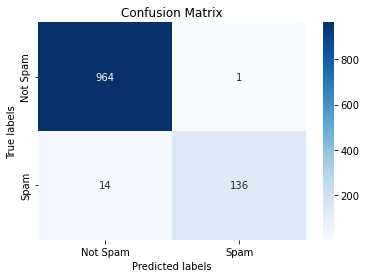

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score
import seaborn as sns
import matplotlib.pyplot as plt

model = SGDClassifier()
model.fit(features,y_train)

features_test = cv.transform(x_test)

y_predict = model.predict(features_test)
#print(model.score(features_test,y_test))

cf_matrix =confusion_matrix(y_test,y_predict)

ax= plt.subplot()
#annot=True to annotate cells
sns.heatmap(cf_matrix, annot=True, ax = ax,cmap='Blues',fmt='');
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Not Spam', 'Spam']); ax.yaxis.set_ticklabels(['Not Spam', 'Spam']);